In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

Part A:

In [2]:
mylius_2000_address = "q3_inputs/mylius_erichsen_land_2000.jpg"
mylius_2020_address = "q3_inputs/mylius_erichsen_land_2020.jpg"
mylius_2000 = cv2.imread(mylius_2000_address)
mylius_2020 = cv2.imread(mylius_2020_address)

In [59]:
mylius_2000_gray = cv2.cvtColor(mylius_2000, cv2.COLOR_BGR2GRAY)
_,mylius_2000_binary =cv2.threshold(mylius_2000_gray, 220, 255, cv2.THRESH_BINARY)
mylius_2020_gray = cv2.cvtColor(mylius_2020, cv2.COLOR_BGR2GRAY)
_,mylius_2020_binary = cv2.threshold(mylius_2020_gray, 220, 255, cv2.THRESH_BINARY)

im = Image.fromarray(mylius_2000_binary.astype(np.uint8)).convert("L")
file_name = "mylius_2000_binary.png"
im.save(file_name)

im = Image.fromarray(mylius_2020_binary.astype(np.uint8)).convert("L")
file_name = "mylius_2020_binary.png"
im.save(file_name)


diff = np.subtract(mylius_2000_binary,mylius_2020_binary)
im = Image.fromarray(diff.astype(np.uint8)).convert("L")
file_name = "mylius_diff_binary.png"
im.save(file_name)

count_white_2000 = cv2.countNonZero(mylius_2000_binary)
count_white_diff = cv2.countNonZero(diff)

# for i in range(len(mylius_2000_binary)):
#     for j in range(len(mylius_2000_binary[0])):
#         if mylius_2000_binary[i][j]==255:
#             count_white_2000+=1
#         if diff[i][j]==255:
#             count_white_diff+=1

percentage = count_white_diff/count_white_2000
print("Percentage of Melting = " + str(percentage))

Percentage of Melting = 0.599968514232288


Part B and C:

In [60]:
def load_image(address):
    image = cv2.imread(address)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return image_hsv

def select_position(image , low_range , up_range):
    low_range_first = np.array([low_range,10,10])
    up_range_first = np.array([up_range,250,250])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(urmia_2000, low_range_first, up_range_first)
    _,output = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    return output

def save_file(image , filename):
    im = Image.fromarray(image.astype(np.uint8))
    im.save(filename)

def calculate_volume(image ,depth):
    num_pixels = 314
    unit = 20000 #m
    volume_pixel = (unit/num_pixels)**2 # m**2
    count_pixels = 0
    count_pixels = cv2.countNonZero(image)
    volume = count_pixels * volume_pixel * depth
    return volume
urmia_2000_address = "q3_inputs/lake_urmia_2000.jpg"
urmia_2018_address = "q3_inputs/lake_urmia_2018.jpg"
urmia_2020_address = "q3_inputs/lake_urmia_2020.jpg"

urmia_2000 = load_image(urmia_2000_address)
urmia_2018 = load_image(urmia_2018_address)
urmia_2020 = load_image(urmia_2020_address)

urmia_2000_binary = select_position(urmia_2000 , 80,130)
save_file(urmia_2000_binary,"urmia_2000_binary.png")

print("voulume in 2000 :")
print(calculate_volume(urmia_2000_binary,2.8))

urmia_2018_binary = select_position(urmia_2018 , 98,140)
save_file(urmia_2018_binary,"urmia_2018_binary.png")
print("voulume in 2018 :")
print(calculate_volume(urmia_2018_binary,0.6))

urmia_2020_binary = select_position(urmia_2020 , 93,140)
save_file(urmia_2020_binary,"urmia_2020_binary.png")
print("voulume in 2020 :")
print(calculate_volume(urmia_2018_binary,0.9))

voulume in 2000 :
15948731388.697308
voulume in 2018 :
651916102.0731063
voulume in 2020 :
977874153.1096596


Part D :

In [61]:

glacier_2003_address = "q3_inputs/furtwangler_glacier_2003.jpg"
glacier_2017_address = "q3_inputs/furtwangler_glacier_2017.jpg"

glacier_2003 = cv2.imread(glacier_2003_address)
glacier_2017 = cv2.imread(glacier_2017_address)

glacier_2003_gray = cv2.cvtColor(glacier_2003, cv2.COLOR_BGR2GRAY)
_,glacier_2003_binary =cv2.threshold(glacier_2003_gray, 205, 255, cv2.THRESH_BINARY)
glacier_2017_gray = cv2.cvtColor(glacier_2017, cv2.COLOR_BGR2GRAY)
_,glacier_2017_binary = cv2.threshold(glacier_2017_gray, 205, 255, cv2.THRESH_BINARY)


im = Image.fromarray(glacier_2003_binary.astype(np.uint8)).convert("L")
file_name = "glacier_2003_binary.png"
im.save(file_name)

im = Image.fromarray(glacier_2017_binary.astype(np.uint8)).convert("L")
file_name = "glacier_2017_binary.png"
im.save(file_name)
unit = 200
count_pixel = 293
step = unit / count_pixel
pixel_size = step * step

glacier_2003_depth = 6.2
glacier_2017_depth =4.8

glacier_2003_count_white = cv2.countNonZero(glacier_2003_binary)
glacier_2017_count_white = cv2.countNonZero(glacier_2017_binary)

# for i in range(len(glacier_2003_binary)):
#     for j in range(len(glacier_2003_binary[0])):
#         if glacier_2003_binary[i][j]==255:
#             glacier_2003_count_white+=1
#         if glacier_2017_binary[i][j]==255:
#             glacier_2017_count_white+=1
            
            
volume_in_2003 = glacier_2003_depth * pixel_size * glacier_2003_count_white
volume_in_2017 = glacier_2017_depth * pixel_size * glacier_2017_count_white

print("----------------------")
print("volume in 2003 is :")
print(volume_in_2003)
print("----------------------")
print("volume in 2017 is :")
print(volume_in_2017)
print("----------------------")


----------------------
volume in 2003 is :
962173.2111032163
----------------------
volume in 2017 is :
386529.4645249217
----------------------


Part E :

In [63]:
siling_1985_address = "q3_inputs/siling_lake_1985.jpg"
siling_1990_address = "q3_inputs/siling_lake_1990.jpg"
siling_1995_address = "q3_inputs/siling_lake_1995.jpg"
siling_2000_address = "q3_inputs/siling_lake_2000.jpg"
siling_2005_address = "q3_inputs/siling_lake_2005.jpg"
siling_2010_address = "q3_inputs/siling_lake_2010.jpg"
siling_2015_address = "q3_inputs/siling_lake_2015.jpg"
siling_2020_address = "q3_inputs/siling_lake_2020.jpg"

In [64]:
def load_image_lake(address):
    image = cv2.imread(address)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # range of blue color in HSV
    low_range = np.array([80,0,0])
    up_range = np.array([140,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(image_hsv, low_range, up_range)
    _,output = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    return output

siling_1985 = load_image_lake(siling_1985_address)
siling_1990 = load_image_lake(siling_1990_address)
siling_1995 = load_image_lake(siling_1995_address)
siling_2000 = load_image_lake(siling_2000_address)
siling_2005 = load_image_lake(siling_2005_address)
siling_2010 = load_image_lake(siling_2010_address)
siling_2015 = load_image_lake(siling_2015_address)
siling_2020 = load_image_lake(siling_2020_address)

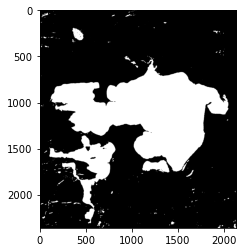

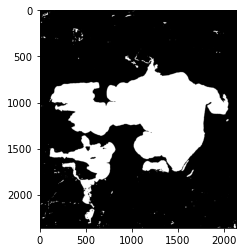

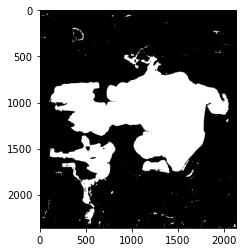

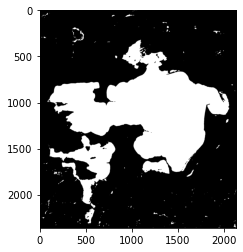

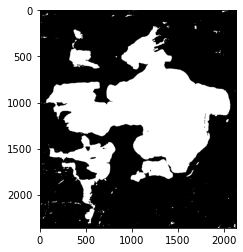

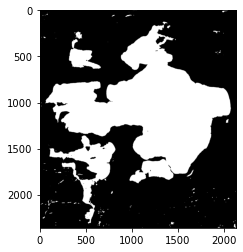

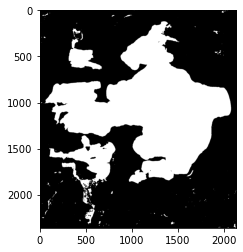

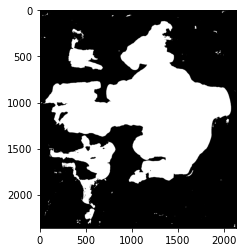

In [65]:
plt.imshow(siling_1985,cmap="gray")
plt.show()
save_file(siling_1985,"siling_1985.png")

plt.imshow(siling_1990,cmap="gray")
plt.show()
save_file(siling_1990,"siling_1990.png")

plt.imshow(siling_1995,cmap="gray")
plt.show()
save_file(siling_1995,"siling_1995.png")

plt.imshow(siling_2000,cmap="gray")
plt.show()
save_file(siling_2000,"siling_2000.png")

plt.imshow(siling_2005,cmap="gray")
plt.show()
save_file(siling_2005,"siling_2005.png")

plt.imshow(siling_2010,cmap="gray")
plt.show()
save_file(siling_2010,"siling_2010.png")

plt.imshow(siling_2015,cmap="gray")
plt.show()
save_file(siling_2015,"siling_2015.png")

plt.imshow(siling_2020,cmap="gray")
plt.show()
save_file(siling_2020,"siling_2020.png")


<BarContainer object of 8 artists>

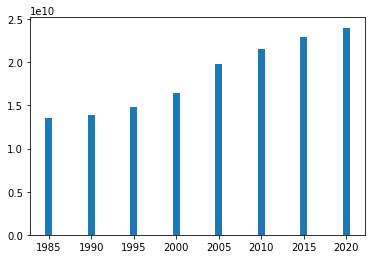

In [55]:
def calculate_volume(image ,depth):
    num_pixels = 250
    unit = 10000 #m
    volume_pixel = (unit/num_pixels)**2 # m**2
    count_pixels = 0
    count_pixels = cv2.countNonZero(image)
    volume = count_pixels * volume_pixel * depth
    return volume
years = [1985,1990,1995,2000,2005,2010,2015,2020]
volumes = []
volumes.append(calculate_volume(siling_1985,6.4))
volumes.append(calculate_volume(siling_1990,6.7))
volumes.append(calculate_volume(siling_1995,7.0))
volumes.append(calculate_volume(siling_2000,7.3))
volumes.append(calculate_volume(siling_2005,7.6))
volumes.append(calculate_volume(siling_2010,7.9))
volumes.append(calculate_volume(siling_2015,8.2))
volumes.append(calculate_volume(siling_2020,8.5))

plt.bar(years,volumes)